# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

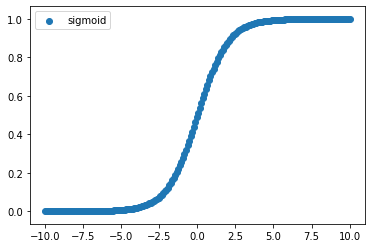

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val = np.linspace(-10, 10, 200)
#Find y_val, by using sigmoid function
y_val = sigmoid(x_val)
#Plot x_val,y_val and label the graph
plt.scatter(x_val, y_val)
plt.legend(['sigmoid'])

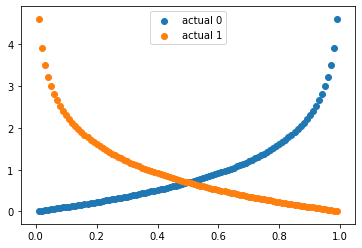

In [4]:
# Plot impact of logloss for single forecasts
import math
def log_loss(pred, actual):
    if actual==0:
        return -math.log(1-pred)
    else:
        return -math.log(pred)
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
log_loss_0 = []
for item in yhat[1:-1]:
    log_loss_0.append(log_loss(item, 0))
# evaluate predictions for a 1 true value
log_loss_1 = []
for item in yhat[1:-1]:
    log_loss_1.append(log_loss(item, 1))
# plot input to loss
plt.scatter(yhat[1:-1], log_loss_0)
plt.scatter(yhat[1:-1], log_loss_1)
plt.legend(['actual 0', 'actual 1'])

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0] = min(log_loss_0) - min(log_loss_1)
ans[0]

0.0

# ***`Processing the Data`***

In [6]:
#Import the dataset of iris from datasets.load_iris()
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = pd.DataFrame(iris['target'])

In [7]:
#Look into the top 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

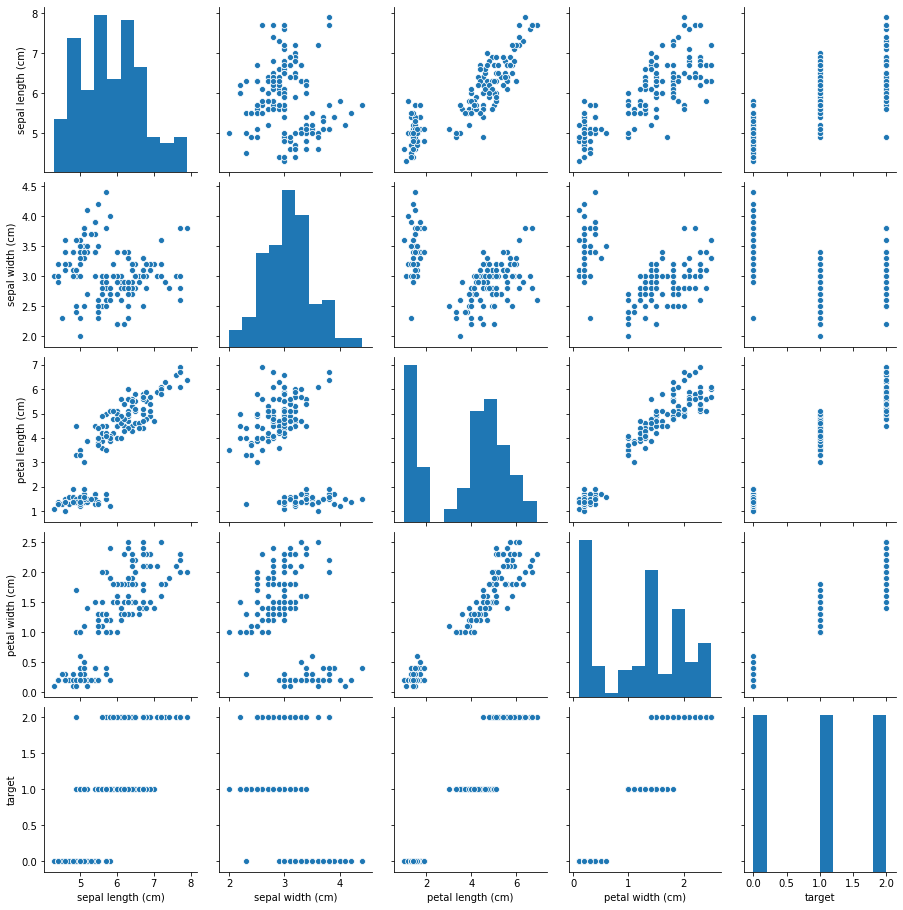

In [12]:
#Visualize the data using seaborn pairplot
import seaborn as sns
sns.pairplot(df)

In [13]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
arr = labelencoder.fit_transform(df['target'])

In [14]:
# Drop old labels(char) data 
df.drop(['target'], inplace=True, axis = 1)
# Substitute new labels(numerical) into data
df['label'] = pd.DataFrame(arr)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
df = df[df['label']<2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [16]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
df_0 = df[df['label']==0]
df_1 = df[df['label']==1]
ans[0] = np.mean(df_0['sepal length (cm)']) - np.mean(df_1['sepal length (cm)'])
ans[0]

-0.9300000000000006

# ***`Obtaining Weight Values`***

In [17]:
# Split the data into X and y
X = df[iris['feature_names']]
y = df['label']

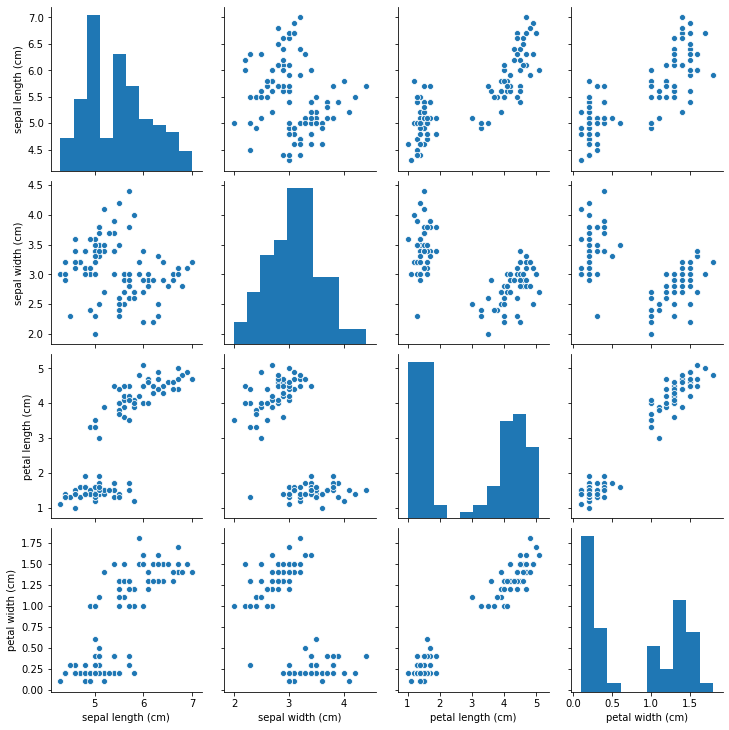

In [18]:
# Visualize X,y
sns.pairplot(X)

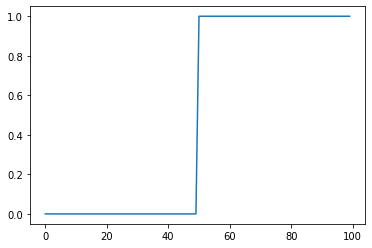

In [19]:
plt.plot(y)

In [20]:
# Convert X,y into arrays
X = np.asarray(X)
y = np.asarray(y)

In [21]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
X_train.shape, X_test.shape

((80, 4), (20, 4))

In [22]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Building our model
model = LogisticRegression(C = 0.1)
model.fit(X_train, y_train)
#Finding the parameter and bias
bias = model.intercept_
parameters = model.coef_

In [23]:
#Printing the parameters and bias
print("Bis is :", bias)
print("Parameters are: ", parameters)

Bis is : [-4.16539827]
Parameters are:  [[ 0.31827833 -0.34767248  1.15962905  0.45959982]]


In [24]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
res = []
for item in parameters[0]:
    res.append(item)
res.append(bias[0])
ans[2] = res
print(ans[2])

[0.31827832935933104, -0.34767247923143274, 1.15962905475424, 0.45959982406030225, -4.165398273900711]


In [25]:
#Predicitng on our test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [26]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("Train accuracy :", train_acc)
print("Test accuracy :", test_acc)
ans[3] = test_acc

Train accuracy : 1.0
Test accuracy : 1.0


In [27]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
out = model.predict(np.array([4.9,4,1.2,0.4]).reshape(1, -1))
out

array([0], dtype=int64)

In [28]:
#The class of the input 
ans[4] = "Setosa"
ans[4]

'Setosa'

In [29]:
import json
ans = [str(item) for item in ans]

filename = "group49_sknishant1@gmail.com_Saurav_Kumar_Nishant_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [30]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'group49_sknishant1@gmail.com_Saurav_Kumar_Nishant_LogisticRegression',
 'status': 'Success'}
